# Predicting car prices

### Dataset: https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv("C://Users//johng//Desktop//data//imports-85.data", encoding="utf-8", names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width','height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price'])

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Numeric columns: symboling, wheel-base, length, width, height, curb-weight, engine-size, compression-rate, city-mpg, highway-mpg
### Target column: price.

In [5]:
clean_df = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price']
cars = cars[clean_df]
cars.shape

(205, 15)

In [6]:
# Verifying the clean dataframe columns
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

### Data cleaning

In [11]:
# Remove '?' from normalized_losses and change its type to float
cars["normalized-losses"] = cars.loc[cars["normalized-losses"] != '?', "normalized-losses"].astype(float)
# Remove all NA values
cars.dropna(axis=0, inplace=True)
# Remove '?' from 'bore' and change its type to float
cars["bore"] = cars.loc[cars["bore"] != '?', "bore"].astype(float)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         164 non-null    float64
 2   length             164 non-null    float64
 3   width              164 non-null    float64
 4   height             164 non-null    float64
 5   curb-weight        164 non-null    int64  
 6   engine-size        164 non-null    int64  
 7   bore               160 non-null    float64
 8   stroke             164 non-null    object 
 9   compression-rate   164 non-null    float64
 10  horsepower         164 non-null    object 
 11  peak-rpm           164 non-null    object 
 12  city-mpg           164 non-null    int64  
 13  highway-mpg        164 non-null    int64  
 14  price              164 non-null    object 
dtypes: float64(7), int64(4), object(4)
memory usage: 20.5+ KB


In [12]:
# Verify the other columns for numeric values
cars["stroke"].value_counts()
# change object type columns to float
cars["stroke"] = pd.to_numeric(cars["stroke"])
cars["horsepower"] = pd.to_numeric(cars["horsepower"])
cars["peak-rpm"] = pd.to_numeric(cars["peak-rpm"])
cars["price"] = pd.to_numeric(cars["price"])

In [13]:
cars.shape

(160, 15)

### Normalize columns (x - mean / standard deviation). Each value will be converted into a z-score so that the mean of each feature is 0 and its standard deviation is 1.

In [14]:
normalized_cars = (cars - cars.mean()) / (cars.std())
# mantain the column 'price' in the normalized data frame
normalized_cars['price'] = cars['price'].copy()

# KNN

## 1) Hyper parameter optimization - Searching for the optimal k, with a train and test set: 80/20. 

In [15]:
# 80% of the normalized dataset is for training
train_df = normalized_cars.iloc[0:128]
# 20% of the normalized dataset is for testing
test_df = normalized_cars.iloc[128:]

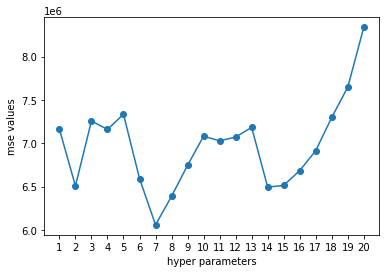

In [16]:
hyper_params = [x for x in range(1, 21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='auto')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = round(mse ** (1/2))
    mse_values.append(mse)
    
plt.plot(hyper_params, mse_values, marker="o")
plt.xlabel("hyper parameters")
plt.ylabel("mse values")
plt.xticks(hyper_params)
plt.show()

### The optimal k is 7, with the min mse, partition of 80/20 and ALL the features of normalized cars dataframe. The rmse value for k=7 is 2461. The actual price will have a difference against the predicted price of 2461 on average. 

### But k=7 will be the better response for a partition different of the ratio 80/20? To answer that we will analyze the K-fold cross validation (where K in this situation is the partition ratio of the dataset, not the hyper-parameter previously studied).


## 2) K-fold cross validation (how many parts the dataset shall be split to find the optimal solution):

In [17]:
features = ['width']

num_folds = list(range(2, len(normalized_cars)))
avg_rmse_list =[]
d = {}

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, normalized_cars[features], normalized_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    avg_rmse_list.append(avg_rmse) 
    d[fold] = avg_rmse
    print(str(fold), "folds-> ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

2 folds->  avg RMSE:  2820.4585300051303 std RMSE:  353.6118069596953
3 folds->  avg RMSE:  2689.97702751408 std RMSE:  90.25889062856182
4 folds->  avg RMSE:  2694.8500376817815 std RMSE:  627.1929953423432
5 folds->  avg RMSE:  2621.9460660482696 std RMSE:  271.75125111764163
6 folds->  avg RMSE:  2663.832647093048 std RMSE:  436.14694485060687
7 folds->  avg RMSE:  2660.4357344088835 std RMSE:  533.0297110587202
8 folds->  avg RMSE:  2632.1270668731586 std RMSE:  694.5891951964876
9 folds->  avg RMSE:  2592.988257874705 std RMSE:  726.0041364605904
10 folds->  avg RMSE:  2689.8652582123395 std RMSE:  669.8791912817293
11 folds->  avg RMSE:  2639.110698102724 std RMSE:  848.6637018254722
12 folds->  avg RMSE:  2607.731542676361 std RMSE:  821.0552867802594
13 folds->  avg RMSE:  2549.394918791358 std RMSE:  869.2435877732921
14 folds->  avg RMSE:  2581.386929719709 std RMSE:  759.0475254776376
15 folds->  avg RMSE:  2525.973606738033 std RMSE:  1022.1615897290395
16 folds->  avg RMSE

In [18]:
print(min(d.items(), key=lambda x: x[1]))

(125, 1783.4056419294868)


### OBS:
### Increasing the number of folds leads to decreasing the error of price prediction. It's explainable: in this case, we overfit the model. However, such a model can demonstrate poor performance on completely new data.
### It's important to remember that we have only few entries in our dataset. To avoid model overfitting, we'd better consider relatively low values of the number of folds.
### Even with the optimal value of 125 folds, we can overfit the model.

# --------------------------------------------------------------------------------------------

## Train/Test Validation

In [23]:

def knn_train_test(train_cols, target_col, df, k=5):
    '''Takes in a train column/columns, the target column, the dataframe, and the number of 
    the nearest neighbors. 
    Trains and tests the model using test/train validation approach. 
    Returns RMSE value.
    '''
    
    # One-column case
    if type(train_cols)==str:
        X_train, X_test, y_train, y_test = train_test_split(df[[train_cols]], df[target_col],
                                                            test_size=0.5, random_state=1)
    # Multi-column case
    elif type(train_cols)==list:
        X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df[target_col],
                                                            test_size=0.5, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse**(0.5)

rmse_default_k = {}

# Isolating all the numeric columns except for `price` as train columns
train_cols = normalized_cars.columns.drop('price')

# Creating a univariate model for each column using the default value of k and adding each RMSE
# to the dictionary
for col in train_cols:
    rmse = knn_train_test(col, 'price', normalized_cars)
    rmse_default_k[col] = round(rmse)

# Sorting the dictionary by RMSE in ascending order
sorted_rmse_default_k = dict(sorted(rmse_default_k.items(), key=operator.itemgetter(1)))
sorted_rmse_default_k

{'width': 3091,
 'curb-weight': 3249,
 'highway-mpg': 3849,
 'engine-size': 3915,
 'length': 3994,
 'wheel-base': 4057,
 'city-mpg': 4438,
 'horsepower': 4592,
 'bore': 5749,
 'height': 5798,
 'compression-rate': 5834,
 'peak-rpm': 6169,
 'stroke': 6282,
 'normalized-losses': 6757}

# The best model is with 'width' column and k=5. Let's vary k value:

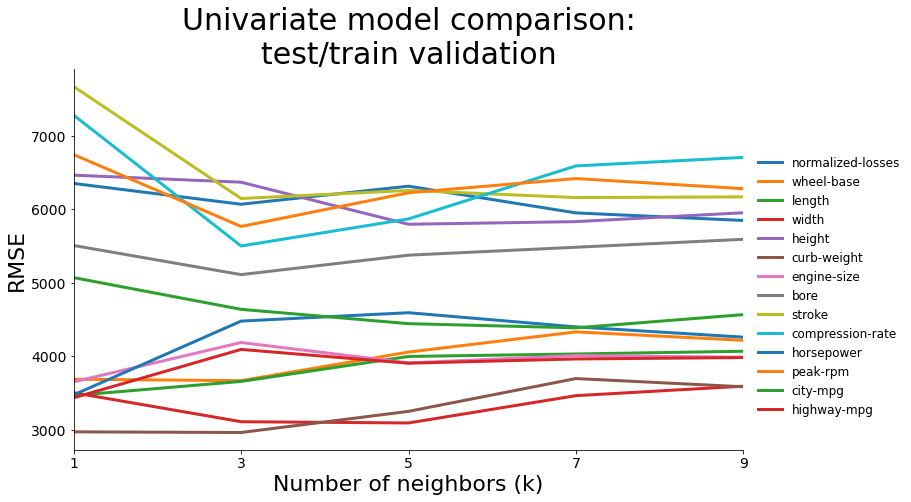

In [24]:
rmse_various_k = {}

plt.figure(figsize=(12,7))

# Creating univariate models for each column with various values of k, adding each RMSE 
# to the dictionary, and plotting the results for all variables
for col in train_cols:
    rmse_various_k[col] = []
    for k in [1, 3, 5, 7, 9]:
        rmse = knn_train_test(col, 'price', cars, k)
        rmse_various_k[col].append(round(rmse))
    plt.plot(list(range(1,10, 2)), rmse_various_k[col], linewidth=3)
plt.title('Univariate model comparison:\ntest/train validation', fontsize=30)
plt.xlabel('Number of neighbors (k)', fontsize=22)
plt.ylabel('RMSE', fontsize=22)
plt.xticks([1,3,5,7,9], fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1,9)
plt.legend(train_cols, frameon=False, bbox_to_anchor=(1.25, 0.8), fontsize=12)
sns.despine()
plt.show()

In [27]:
k_1 = rmse_various_k['curb-weight'][0]
k_2 = rmse_various_k['curb-weight'][1]
k_3 = rmse_various_k['curb-weight'][2]
print(f'\033[1mRMSE for the univariate models:\033[0m'
      f'\nk=1: {k_1}'
      f'\nk=2: {k_2}'
      f'\nk=3: {k_3}')

RMSE for the univariate models:
k=1: 2970
k=2: 2961
k=3: 3249


### From the graph above we can see that the best feature (lowest rmse) is 'curb-weight'. However, the best k for this feature is show in the calculation above, with k=2.

# Creating a multivariate model.
### First, we're going to try different combinations of the best features (with the lowest average RMSE) from the previous step to train and test a multivariate KNN model using the default k value (k=5): 2, 3, 4, and 5 best features

In [28]:
rmse_various_k_mean = {}

# Finding the mean value of RMSE for each variable
for key in rmse_various_k:
    rmse_various_k_mean[key] = np.mean(rmse_various_k[key])

# Sorting the dictionary by RMSE in ascending order
sorted_rmse_various_k_mean = dict(sorted(rmse_various_k_mean.items(), key=operator.itemgetter(1)))
sorted_rmse_various_k_mean

{'curb-weight': 3292.0,
 'width': 3351.4,
 'length': 3843.6,
 'highway-mpg': 3875.4,
 'engine-size': 3948.6,
 'wheel-base': 3992.0,
 'horsepower': 4241.2,
 'city-mpg': 4621.6,
 'bore': 5415.2,
 'height': 6085.0,
 'normalized-losses': 6109.0,
 'peak-rpm': 6289.2,
 'compression-rate': 6391.8,
 'stroke': 6483.0}

### The best features are: 'curb-weight', 'width', 'length', 'highway-mpg' and 'engine-size'.

In [31]:
rmse_multivariate = []

for i in [2,3,4,5]:
    
    # Selecting from 2 to 5 best features
    train_cols_list = list(sorted_rmse_various_k_mean.keys())[:i]
    
    # Creating a multivariate model for each combination of features using the default k=5 
    # and rounding the resulting RMSE
    rmse = round(knn_train_test(train_cols_list, 'price', cars))
    
    # Appending the RMSE value of each multivariate model to the list
    rmse_multivariate.append(rmse)
        
rmse_multivariate

[3248, 3247, 3247, 3229]

### TOP 3 models:
                        with 2 features: 'curb-weight' and 'width'.
                        with 3 features: 'curb-weight', 'width' and 'length'.
                        with 5 features: 'curb-weight', 'width', 'length', 'highway-mpg' and 'engine-size'.

### Let's tune the hyperparameter k for each of these TOP3 models and observe the results:

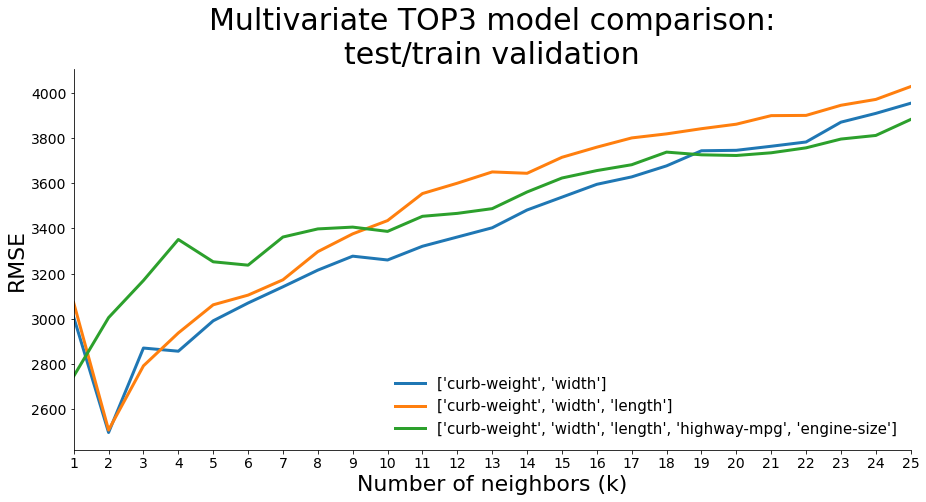

In [35]:
train_cols_list = [['curb-weight', 'width'],
                   ['curb-weight', 'width', 'length'],
                   ['curb-weight', 'width', 'length', 'highway-mpg', 'engine-size']]
rmse_multivar_various_k = {}

plt.figure(figsize=(15,7))

# Creating multivariate models for each feature combination with k from 1 to 25, adding each RMSE
# to the dictionary, and plotting the results for all the models
for ind, lst in enumerate(train_cols_list):
    rmse_multivar_various_k[ind+1] = []
    for k in list(range(1,26)):
        rmse = knn_train_test(lst, 'price', normalized_cars, k)
        rmse_multivar_various_k[ind+1].append(round(rmse))
    plt.plot(list(range(1,26)), rmse_multivar_various_k[ind+1], linewidth=3)
plt.title('Multivariate TOP3 model comparison:\ntest/train validation', fontsize=30)
plt.xlabel('Number of neighbors (k)', fontsize=22)
plt.ylabel('RMSE', fontsize=22)
plt.xlim(1,25)
plt.xticks(list(range(1,26)), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(train_cols_list, frameon=False, loc=4, bbox_to_anchor=None, fontsize=15)
sns.despine()
plt.show()

### The 2-feature model is the best one, with the optimal number of neighbors k equal to 2. 

In [39]:
np.min(rmse_multivar_various_k[1])

2494

##### In practice, considering too few neighbors (i.e. too small values of k) implies a high impact of noise on the result. Instead, considering too many neighbors results in involving irrelevant neighbors from other clusters (and indeed, for higher values of k, the error is constantly increasing).
##### Since our goal is to select the model with the smallest error and, hence, the highest predictive capacity for the car price, let's review our best results so far:

#### Univariate models:
                        Default k=5: width (RMSE=3091).
                        Optimal k=2: curb-weight (RMSE=2961).

#### Multivariate models:
                        Optimal k=2: curb-weight and width (RMSE=2494).

#### The optimal multivariate model shows the lowest RMSE with a combination of default and optimal univariante models.

### K-fold:
    Now, we'll create univariate KNN models using k-fold cross-validation approach. This time, we won't vary the number of the nearest neighbors leaving it equal to the default value k=5 (where k is the number of the nearest neighbors, not the number of folds). Instead, let's vary the number of folds and visualize the results:

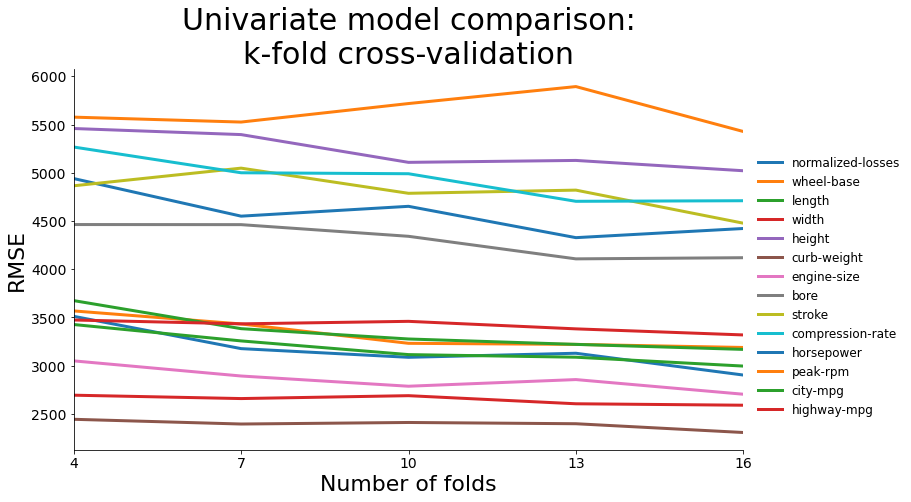

{'curb-weight': 2391.0,
 'width': 2647.4,
 'engine-size': 2858.0,
 'horsepower': 3161.6,
 'city-mpg': 3176.6,
 'wheel-base': 3328.6,
 'length': 3345.2,
 'highway-mpg': 3413.8,
 'bore': 4299.4,
 'normalized-losses': 4579.2,
 'stroke': 4800.4,
 'compression-rate': 4935.2,
 'height': 5223.4,
 'peak-rpm': 5629.6}

In [86]:
def k_fold_cross_val(n_splits, train_cols, target_col, df, k=5):
    '''Takes in the number/numbers of folds as an integer or a list correspondingly, a train
    column/columns, the target column, the dataframe, and the number of the nearest neighbors.
    Trains and tests the model using k-fold cross-validation approach. 
    Returns RMSE value.
    '''
    
    # One number of folds
    if type(n_splits)==int:
        kf = KFold(n_splits, shuffle=True, random_state=1)
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # One-column case
        if type(train_cols)==str:
            mses = cross_val_score(knn, df[[train_cols]], df['price'],
                                   scoring='neg_mean_squared_error', cv=kf)
        
        # Multi-column case
        elif type(train_cols)==list:
            mses = cross_val_score(knn, df[train_cols], df['price'],
                                   scoring='neg_mean_squared_error', cv=kf)
        return np.mean(abs(mses)**0.5)
    
    # Several numbers of folds
    if type(n_splits)==list:
        for n in n_splits:
            kf = KFold(n, shuffle=True, random_state=1)
            knn = KNeighborsRegressor(n_neighbors=k)
            
            # One-column case
            if type(train_cols)==str:
                mses = cross_val_score(knn, df[[train_cols]], df['price'], 
                                       scoring='neg_mean_squared_error', cv=kf)
                
            # Multi-column case
            elif type(train_cols)==list:
                mses = cross_val_score(knn, df[train_cols], df['price'], 
                                       scoring='neg_mean_squared_error', cv=kf)
            rmses = np.sqrt(np.absolute(mses))
            avg_rmse = np.mean(rmses)
            std_rmse = np.std(rmses)
            print(f'{n} folds: \navg_RMSE={round(avg_rmse)}, std_RMSE={round(std_rmse)}')            
            
rmse_kfold_univar = {}

plt.figure(figsize=(12,7))

# Creating univariate models for each column using k-fold cross-validation, the default k and 
# various numbers of folds, adding each RMSE to the dictionary, and plotting the results
for col in train_cols:
    rmse_kfold_univar[col] = []
    for n in [4, 7, 10, 13, 16]:
        rmse = k_fold_cross_val(n, col, 'price', cars)
        rmse_kfold_univar[col].append(round(rmse))
    plt.plot(list(range(4,17, 3)), rmse_kfold_univar[col], linewidth=3)
plt.title('Univariate model comparison:\nk-fold cross-validation', fontsize=30)
plt.xlabel('Number of folds', fontsize=22)
plt.ylabel('RMSE', fontsize=22)
plt.xticks([4, 7, 10, 13, 16], fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(4,16)
plt.legend(train_cols, frameon=False, bbox_to_anchor=(1.25, 0.8), fontsize=12)
sns.despine()
plt.show()

rmse_kfold_univar_mean = {}

# Finding the mean value of RMSE for each variable
for key in rmse_kfold_univar:
    rmse_kfold_univar_mean[key] = np.mean(rmse_kfold_univar[key])

# Sorting the dictionary by RMSE in ascending order
sorted_rmse_kfold_univar_mean = dict(sorted(rmse_kfold_univar_mean.items(), key=operator.itemgetter(1)))
sorted_rmse_kfold_univar_mean

#### Creating Multivariate Models
    Let's now create some multivariate models. We'll apply the following algorithm:

    Select 5 best features from the previous step: curb-weight, width, length, highway-mpg, and engine-size.
    Try different combinations of them: 2, 3, 4, and 5 best features:
    curb-weight, width
    curb-weight, width, length
    curb-weight, width, length, highway-mpg
    curb-weight, width, length, highway-mpg, and engine-size.
    Vary the number of folds (the same selection as we used for the univariate models: 4, 7, 10, 13, 16).
    Vary the number of the nearest neighbors from 3 to 10.
    Train and test a multivariate KNN model for each combination of features, using different numbers of folds and nearest neighbors.
    Visualize the results (each figure will represent all 4 combinations of features, with all the options of the fold numbers from the selection and a fixed number of the nearest neighbors).

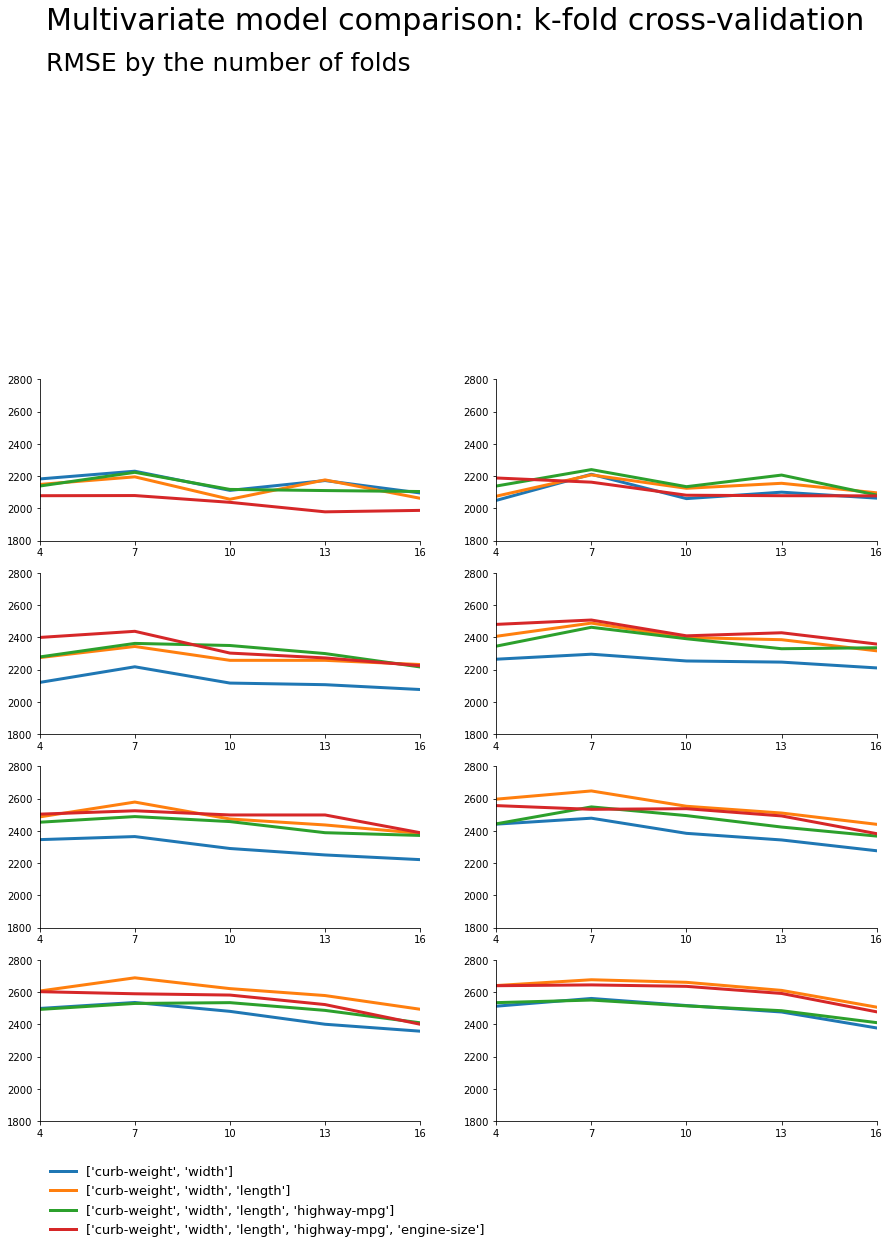

In [78]:
train_cols_list = [['curb-weight', 'width'],
                   ['curb-weight', 'width', 'length'],
                   ['curb-weight', 'width', 'length', 'highway-mpg'],
                   ['curb-weight', 'width', 'length', 'highway-mpg', 'engine-size']]
rmse_kfold_multivar = {}

plt.figure(figsize=(15,35))

# Creating multivariate models for each feature combination using k-fold cross-validation,
# various numbers of folds and the nearest neighbors, adding each RMSE to the dictionary,
# and plotting the results
for k in range(3,11):
    plt.subplot(10, 2, k-2)
    for ind, lst in enumerate(train_cols_list):
        rmse_kfold_multivar[ind+1] = []
        for n in [4, 7, 10, 13, 16]:
            rmse = k_fold_cross_val(n, lst, 'price', normalized_cars, k)
            rmse_kfold_multivar[ind+1].append(round(rmse))
        plt.plot([4, 7, 10, 13, 16], rmse_kfold_multivar[ind+1], linewidth=3)
        # plt.text(14.8, 3750, f'k={k}', fontsize=14)
    if k==10:
        plt.legend(train_cols_list, frameon=False, bbox_to_anchor=(0,-0.2), fontsize=13)
        plt.text(-10.2, 8570,'Multivariate model comparison: k-fold cross-validation', fontsize=30)
        plt.text(-10.2, 8320,'RMSE by the number of folds', fontsize=25)
    plt.xticks([4, 7, 10, 13, 16], fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(1800,2800)
    plt.xlim(4,16)
    sns.despine()
plt.show()

### Observations:

- ##### Increasing the number of folds leads to decreasing the error of price prediction on the test set for all the models. It's explainable: in this case, we overfit the model. However, such a model can demonstrate poor performance on completely new data.

- ##### Increasing the number of the nearest neighbors leads, in the longer term, to the increase of the error of price prediction (because of involving irrelevant neighbors). It's especially evident for the models with more features that are more sensitive to the changes of k. To reduce the error, keeping at the same time as many features for price prediction as reasonably possible, we have to consider relatively low k values.

- ##### It's important to remember that we have only few entries in our dataset. To avoid model overfitting, we'd better consider relatively low values of the number of folds.

In [103]:
# Calsulation the RMSE value of the model that performed best of all
# Kfold fuction already defined above: k_fold_cross_val(n_splits, train_cols, target_col, df, k=5):
rmse = round(k_fold_cross_val(3,['curb-weight', 'width', 'length', 'highway-mpg', 'engine-size'], 'price', normalized_cars, 2))
print(f'\033[1mRMSE=\033[0m{rmse}')
rmse = round(k_fold_cross_val(5,['curb-weight', 'width', 'length', 'highway-mpg', 'engine-size'], 'price', normalized_cars, 2))
print(f'\033[1mRMSE=\033[0m{rmse}')
rmse = round(k_fold_cross_val(3,['curb-weight', 'width'], 'price', normalized_cars, 2))
print(f'\033[1mRMSE=\033[0m{rmse}')

RMSE=1984
RMSE=2192
RMSE=2153


# To avoid overfitting the number of folders shall be low. The best performance is with five features, k=2 and folds=3, with RMSE=1984. 